In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('dirty_iris.csv')

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,NaN,0.2,setosa
2,4.7,3.2,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  127 non-null    float64
 1   sepal width (cm)   135 non-null    float64
 2   petal length (cm)  132 non-null    float64
 3   petal width (cm)   134 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


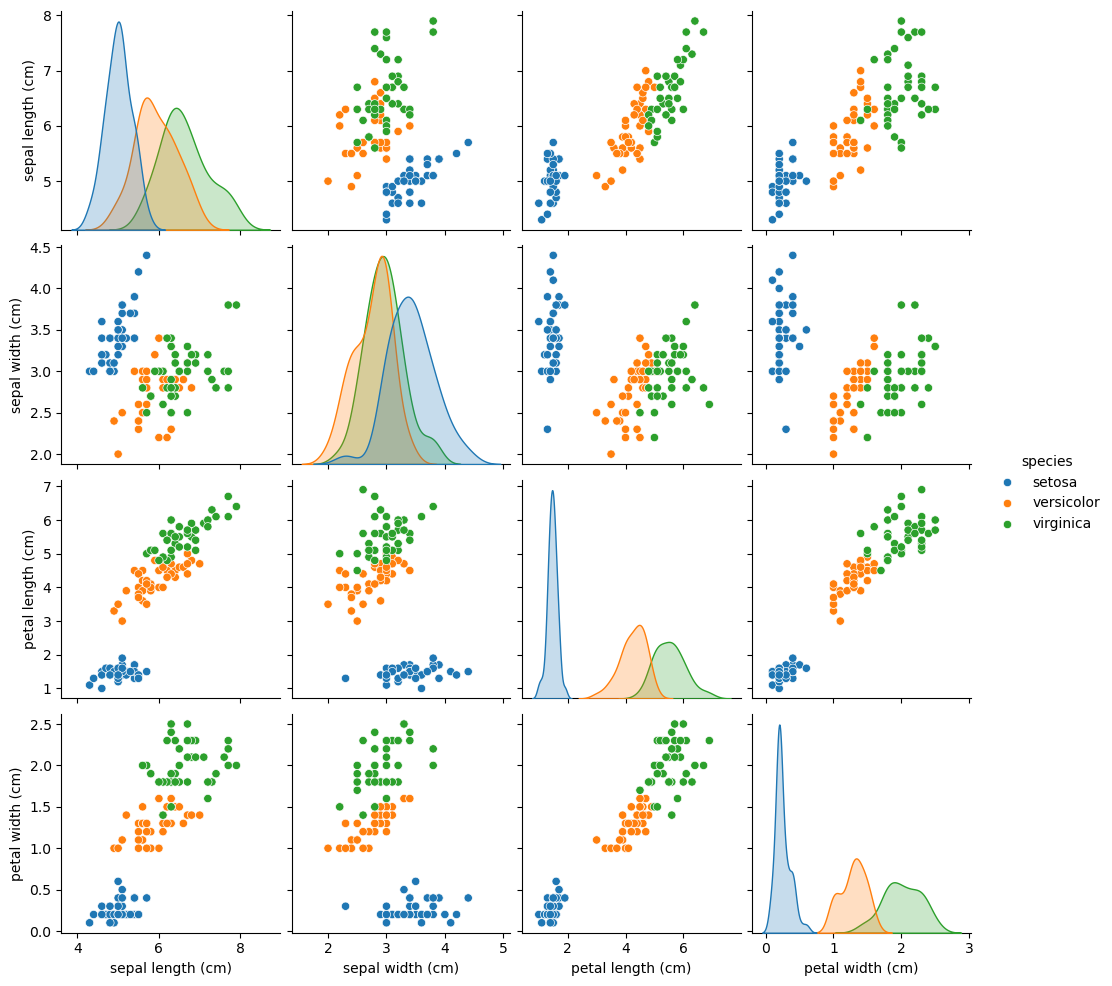

In [10]:
sns.pairplot(df ,hue='species')

In [11]:
sns.lmplot?

Signature:
sns.lmplot(
    data,
    *,
    x=None,
    y=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to 

In [12]:
X = df.drop(['species'], axis=1)
y = df['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


## label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=10)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [16]:
train_X.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
32,NaN,4.1,1.5,0.1
52,NaN,3.1,4.9,1.5
70,5.9,3.2,4.8,NaN
121,5.6,2.8,NaN,2.0
144,6.7,3.3,5.7,2.5
68,6.2,2.2,4.5,1.5
109,NaN,3.6,6.1,NaN
81,5.5,2.4,3.7,1.0
78,NaN,2.9,4.5,1.5
51,6.4,NaN,4.5,1.5


In [17]:
# Instantiate learning model (k = 3)
knc = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
# Fitting the model
knc.fit(train_X,train_y)
# Predicting the Test set results
pred_y = knc.predict(test_X)
# Getting the accuracy score
accuracy = metrics.accuracy_score(pred_y,test_y)
print('The accuracy of the KNN is', accuracy)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(np.count_nonzero(pred_y == test_y))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_y,test_y))